In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt
from sklearn import svm, datasets
pd.set_option('display.max_columns', None)


In [2]:
def make_meshgrid(x, y, h=10):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
dataset = pd.read_csv("train.csv")
dataset = dataset[(dataset.price_range <= 1)]
orig_ds_cols = dataset.columns.to_list()

In [4]:
X = dataset.drop(columns=["price_range"])
y = dataset.price_range
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = SVC()
t = time()
clf.fit(X_train, y_train)
print(f"\n{time() - t}")
print(acc:=accuracy_score(predict:=clf.predict(X_test),y_test) * 100)
predict


0.03593754768371582
79.60000000000001


array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

Text(0.5, 0, 'x label here')

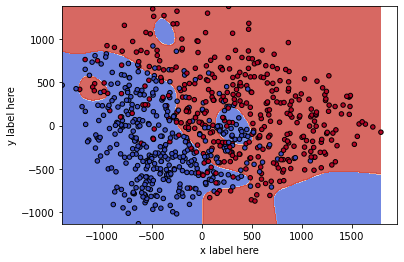

In [6]:
clf = SVC(kernel='rbf',C=100000).fit(X_train, y_train)
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')

In [7]:
 def categorize(dataset, feature_name: str, num: int = None,bins = None):
        ds = dataset.copy()
        _max = ds[feature_name].max()
        _min = ds[feature_name].min()
        if type(num) == int:   
            _bins = np.linspace(_min,_max,num+1)
            _lbls = list(range(num))
        else:
            _bins = [_min] + bins + [_max]
            _lbls = list(range(len(_bins)-1))
        return pd.cut(ds[feature_name],_bins,labels=_lbls).cat.codes
def rem(ls,rm,ad):
    return [x for x in ls if x not in rm] + ad

In [8]:
dataset["bp_1"] = categorize(dataset,"battery_power",num=5)
dataset["bp_2"] = categorize(dataset,"battery_power",bins=[800,1000,1250,1333,1444,1720,1900])
dataset = pd.get_dummies(dataset,columns =["n_cores"])
dataset["sc_a"] = dataset.sc_h * dataset.sc_w
dataset["mobile_wt_log"] = np.log(dataset.mobile_wt)
import scipy
dataset["mobile_wt_boxcox"] = scipy.stats.boxcox(dataset.mobile_wt)[0]

In [9]:
ss = [["bp_1"],["bp_2"],["n_cores_" + str(i) for i in range(1,9)],["sc_a"],["mobile_wt_log"],["mobile_wt_boxcox"]]
dd = [["battery_power","bp_2"],["battery_power","bp_1"],["n_cores"],["sc_w","sc_h"],["mobile_wt_boxcox","mobile_wt"],["mobile_wt_log","mobile_wt"]]
y = dataset.price_range
ss_flaten = [[item for sublist in ss for item in sublist]]

In [10]:
# for i in range(len(ss)):
print("all columns")
X = dataset[[x for x in dataset.columns.to_list() if x not in ["price_range"]]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = SVC()
t = time()
clf.fit(X_train, y_train)
#     print(f"\n{time() - t}")
print(acc:=accuracy_score(predict:=clf.predict(X_test),y_test) * 100)

all columns
96.39999999999999


In [11]:
dataset.columns.to_list(),["price_range"]

(['battery_power',
  'blue',
  'clock_speed',
  'dual_sim',
  'fc',
  'four_g',
  'int_memory',
  'm_dep',
  'mobile_wt',
  'pc',
  'px_height',
  'px_width',
  'ram',
  'sc_h',
  'sc_w',
  'talk_time',
  'three_g',
  'touch_screen',
  'wifi',
  'price_range',
  'bp_1',
  'bp_2',
  'n_cores_1',
  'n_cores_2',
  'n_cores_3',
  'n_cores_4',
  'n_cores_5',
  'n_cores_6',
  'n_cores_7',
  'n_cores_8',
  'sc_a',
  'mobile_wt_log',
  'mobile_wt_boxcox'],
 ['price_range'])

0.816


[Text(158.53065340909092, 209.07692307692307, 'X[13] <= 2296.5\ngini = 0.75\nsamples = 1500\nvalue = [383, 378, 359, 380]'),
 Text(64.12244318181818, 192.35076923076923, 'X[13] <= 1103.0\ngini = 0.591\nsamples = 819\nvalue = [383, 346, 90, 0]'),
 Text(30.182727272727277, 175.62461538461537, 'X[11] <= 1478.0\ngini = 0.182\nsamples = 345\nvalue = [310, 35, 0, 0]'),
 Text(23.841818181818184, 158.89846153846153, 'X[0] <= 1815.5\ngini = 0.139\nsamples = 333\nvalue = [308, 25, 0, 0]'),
 Text(17.24727272727273, 142.1723076923077, 'X[13] <= 1052.5\ngini = 0.078\nsamples = 294\nvalue = [282, 12, 0, 0]'),
 Text(10.145454545454546, 125.44615384615385, 'X[11] <= 962.0\ngini = 0.043\nsamples = 275\nvalue = [269, 6, 0, 0]'),
 Text(6.087272727272728, 108.72, 'X[16] <= 2.5\ngini = 0.009\nsamples = 220\nvalue = [219, 1, 0, 0]'),
 Text(4.058181818181819, 91.99384615384615, 'X[3] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0, 0]'),
 Text(2.0290909090909093, 75.2676923076923, 'gini = 0.0\nsamples = 

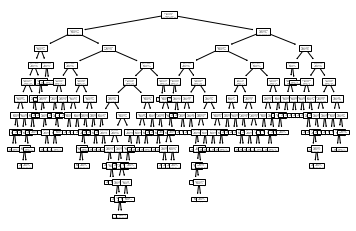

In [12]:
dataset = pd.read_csv("train.csv")
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_weight_fraction_leaf=0.001)
X = dataset.drop(columns=["price_range"])
y = dataset.price_range
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train,y_train)
print(accuracy_score(predict:=clf.predict(X_test),y_test))
from sklearn.tree import plot_tree
plot_tree(clf)

In [13]:
dataset = pd.read_csv("train.csv")
X = dataset.drop(columns=["price_range"])
y = dataset.price_range
X_train, X_test, y_train, y_test = train_test_split(X, y)

Text(0, 0.5, 'Accuracy')

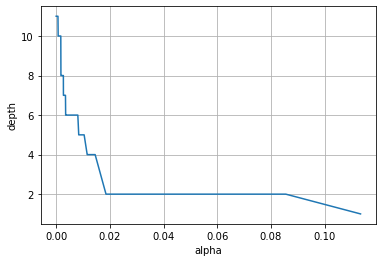

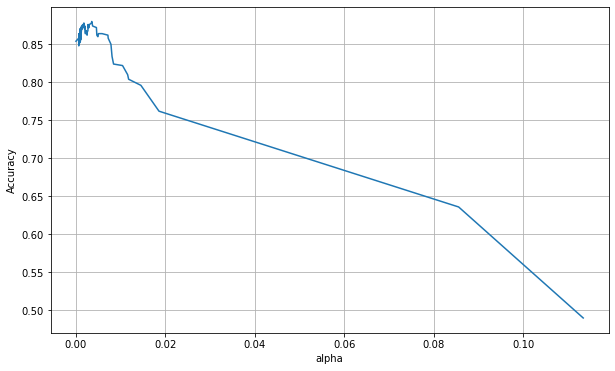

In [14]:
clf = DecisionTreeClassifier()
# get ccp alphas
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
# get classifiers
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# get tree depth
tree_depths = [clf.tree_.max_depth for clf in clfs]
# get test accuracy
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
# plot depth per alpha
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.grid()
plt.xlabel("alpha")
plt.ylabel("depth")
# plot depth per alpha
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("alpha")
plt.ylabel("Accuracy")

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
accuracy_score(clf.predict(X_test),y_test)

0.914

In [16]:
from datetime import datetime
import time

def mdy_to_ymd(d):
#     return datetime.strptime(, ).strftime('%Y-%m-%d')
    return time.mktime(datetime.strptime(d, '%d-%b-%y').timetuple())

In [19]:
dataset = pd.read_csv("dataset.csv")
dataset["Date"] = dataset.apply(lambda row : mdy_to_ymd(row['Date']), axis = 1)

In [20]:
from re import sub
from decimal import Decimal
from sklearn.metrics import mean_squared_error

In [21]:
dataset = dataset[["Date","Price"]]

In [22]:
dataset["Price"] = dataset.apply(lambda row : float(Decimal(sub(r'[^\d.]', '', row["Price"]))), axis = 1)

In [23]:
test = dataset[dataset.Date >= time.mktime(datetime.strptime("20-01-02", '%y-%m-%d').timetuple())]
train = dataset[dataset.Date < time.mktime(datetime.strptime("20-01-02", '%y-%m-%d').timetuple())]

In [24]:
from sklearn.svm import SVR
model = SVR()
model.fit(train[["Date"]],train.Price)

SVR()

In [25]:
SIZE = 60 #we take 2 past months here for each time-series point
COLUMNS = ['t{}'.format(x) for x in range(SIZE)] + ['target']
df = []
for i in range(SIZE, dataset.shape[0]):
    df.append(dataset.loc[i-SIZE:i, 'Price'].tolist())
df = pd.DataFrame(df, columns=COLUMNS)
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,target
0,57807.1,57720.3,53560.8,54841.4,55036.5,54020.5,48963.6,50088.9,51143.6,51729.5,53820.2,56483.2,55646.1,56207.1,60041.9,61379.7,63216.0,62980.4,63540.9,59863.8,59978.7,59748.4,58118.7,58077.4,55948.7,57996.3,58993.4,58199.9,57059.9,58977.3,58718.3,58763.7,58771.3,57616.2,55765.2,55862.9,55036.1,51322.3,52325.4,54452.5,54158.3,57383.8,58093.4,58088.0,57656.0,58913.5,56889.7,55791.3,59113.7,61195.3,57265.1,57799.5,55851.9,54879.0,52311.0,50982.3,48855.6,48792.5,48428.0,50395.1,48424.2
1,57720.3,53560.8,54841.4,55036.5,54020.5,48963.6,50088.9,51143.6,51729.5,53820.2,56483.2,55646.1,56207.1,60041.9,61379.7,63216.0,62980.4,63540.9,59863.8,59978.7,59748.4,58118.7,58077.4,55948.7,57996.3,58993.4,58199.9,57059.9,58977.3,58718.3,58763.7,58771.3,57616.2,55765.2,55862.9,55036.1,51322.3,52325.4,54452.5,54158.3,57383.8,58093.4,58088.0,57656.0,58913.5,56889.7,55791.3,59113.7,61195.3,57265.1,57799.5,55851.9,54879.0,52311.0,50982.3,48855.6,48792.5,48428.0,50395.1,48424.2,49595.5
2,53560.8,54841.4,55036.5,54020.5,48963.6,50088.9,51143.6,51729.5,53820.2,56483.2,55646.1,56207.1,60041.9,61379.7,63216.0,62980.4,63540.9,59863.8,59978.7,59748.4,58118.7,58077.4,55948.7,57996.3,58993.4,58199.9,57059.9,58977.3,58718.3,58763.7,58771.3,57616.2,55765.2,55862.9,55036.1,51322.3,52325.4,54452.5,54158.3,57383.8,58093.4,58088.0,57656.0,58913.5,56889.7,55791.3,59113.7,61195.3,57265.1,57799.5,55851.9,54879.0,52311.0,50982.3,48855.6,48792.5,48428.0,50395.1,48424.2,49595.5,45164.0
3,54841.4,55036.5,54020.5,48963.6,50088.9,51143.6,51729.5,53820.2,56483.2,55646.1,56207.1,60041.9,61379.7,63216.0,62980.4,63540.9,59863.8,59978.7,59748.4,58118.7,58077.4,55948.7,57996.3,58993.4,58199.9,57059.9,58977.3,58718.3,58763.7,58771.3,57616.2,55765.2,55862.9,55036.1,51322.3,52325.4,54452.5,54158.3,57383.8,58093.4,58088.0,57656.0,58913.5,56889.7,55791.3,59113.7,61195.3,57265.1,57799.5,55851.9,54879.0,52311.0,50982.3,48855.6,48792.5,48428.0,50395.1,48424.2,49595.5,45164.0,46136.7
4,55036.5,54020.5,48963.6,50088.9,51143.6,51729.5,53820.2,56483.2,55646.1,56207.1,60041.9,61379.7,63216.0,62980.4,63540.9,59863.8,59978.7,59748.4,58118.7,58077.4,55948.7,57996.3,58993.4,58199.9,57059.9,58977.3,58718.3,58763.7,58771.3,57616.2,55765.2,55862.9,55036.1,51322.3,52325.4,54452.5,54158.3,57383.8,58093.4,58088.0,57656.0,58913.5,56889.7,55791.3,59113.7,61195.3,57265.1,57799.5,55851.9,54879.0,52311.0,50982.3,48855.6,48792.5,48428.0,50395.1,48424.2,49595.5,45164.0,46136.7,46345.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3877,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3878,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3879,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
# df_test = df[df.Date >= time.mktime(datetime.strptime("20-01-02", '%y-%m-%d').timetuple())]
# df_train = df[df.Date < time.mktime(datetime.strptime("20-01-02", '%y-%m-%d').timetuple())]

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
min_ = 999999
s = []
mins = []
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df[[f't{i}' for i in range(0,60)]],df.target)
    for i in range(1,60):
        X_tr, X_te = X_train[[f't{i}' for i in range(59 - i + 1,60)]], X_test[[f't{i}' for i in range(59 - i + 1,60)]]
        model.fit(X_tr,y_train)
        if (m:=mean_squared_error(model.predict(X_te),y_test)) < min_:
            min_ = m
            ii = i
    mins.append(min_)
    s.append(ii)
    min_ = 999999
print(s,min_,len(s))

data = dict(zip([i for i in range(60)],[0 for _ in range(60)]))  
for i in s:
    data[i]+=1
for i,v in data.items():
    if v != 0:
        print(f"{i}: {v}")

[11, 1, 8, 1, 1, 3, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 11, 15, 9, 1, 21, 1, 11, 1, 1, 12, 2, 1, 2, 6, 6, 2, 19, 11, 6, 1, 4, 11, 11, 9, 1, 7, 3, 1, 1, 11, 1, 1, 1, 14, 2, 1, 1, 11, 6, 3, 1, 6, 1, 15, 1, 15, 2, 1, 1, 1, 14, 6, 6, 2, 1, 1, 1, 15, 6, 2, 3, 1, 6, 1, 11, 14, 14, 2, 8, 1, 1, 14, 1, 5, 1, 1, 17, 1, 1, 1, 1, 15, 1] 999999 100
1: 47
2: 9
3: 4
4: 1
5: 1
6: 10
7: 1
8: 2
9: 2
11: 9
12: 1
14: 5
15: 5
17: 1
19: 1
21: 1


In [ ]:
X_te